# Grab Essentials

In [76]:
# pipelining tools
from fn_graph import Composer

# data manipuluation
import pandas as pd
import numpy as np

# ml
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# graphing
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
%matplotlib inline
# set logger
import logging
logging.getLogger().setLevel(logging.INFO)

# Build ML Pipeline

INFO:root:NOT YET IMPLEMENTED
INFO:root:Stage: Generate cancer 
INFO:root:NOT YET IMPLEMENTED
INFO:root:NOT YET IMPLEMENTED
INFO:root:Stage: Parse Data
INFO:root:Stage: Run Data Diagnostics
INFO:root:(569, 31)
INFO:root:[dtype('float64') dtype('int64')]


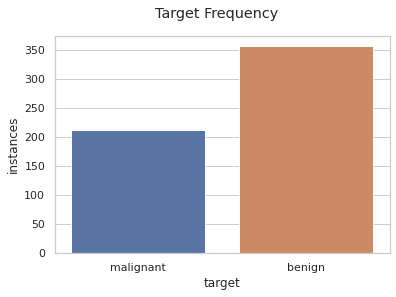

INFO:root:Stage: Train Test Split
INFO:root:Stage: fit baseline model
INFO:root:Stage: Run 0.631578947368421
INFO:root:NOT YET IMPLEMENTED
INFO:root:NOT YET IMPLEMENTED
INFO:root:NOT YET IMPLEMENTED
INFO:root:NOT YET IMPLEMENTED
INFO:root:NOT YET IMPLEMENTED
INFO:root:NOT YET IMPLEMENTED
INFO:root:NOT YET IMPLEMENTED
INFO:root:


Workflow Understanding:


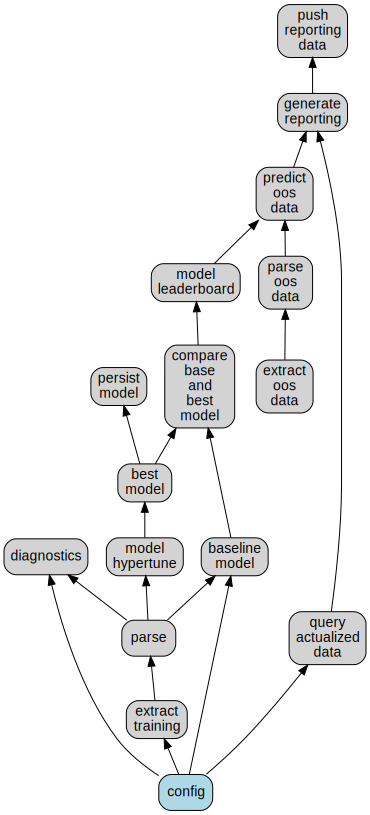

In [154]:
config = {
    'dataset':'cancer',
    'pre_model_diagnostic':True,
    'validation_model_diagnostic':True,
    'validation_pct': .3,
    'show_fn_graph':True
}

def extract_training(config):    
    dataset = config['dataset']
    logging.info(f'Stage: Generate {dataset} ')
    if dataset == 'iris':
        return load_iris()
    elif dataset == 'digits':
        return load_digits()
    elif dataset == 'wine':
        return load_wine()
    elif dataset == 'cancer':
        return load_breast_cancer()
    
def parse(extract_training):
    
    logging.info('Stage: Parse Data')
    
    return (
        pd.DataFrame(extract_training['data'], columns=extract_training['feature_names'])
        .assign(target = extract_training['target'])
    )
    
    
def diagnostics(parse, config):
    
    if config['pre_model_diagnostic'] == True:
        logging.info('Stage: Run Data Diagnostics')
        logging.info(parse.shape)
        logging.info(parse.dtypes.unique())
        
        
        target_map = {key:value for key,value in zip(range(len(outputs['extract_training']['target_names'])),outputs['extract_training']['target_names'])}
        df_target = (
            parse
            .groupby('target').size().reset_index()
            .rename(columns = {0:'instances'})
            .assign(target = lambda x: x.target.replace(target_map))
        )

        # plot
        fig, axes = plt.subplots()
        sns.set_theme(style="whitegrid")
        fig.suptitle('Target Frequency')
        plot = sns.barplot(ax=axes, x="target", y="instances", data=df_target)
        plt.show()
        
    
def baseline_model(parse, config):
    logging.info('Stage: Train Test Split')
    X, y = parse.drop(columns = 'target'), parse['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0,test_size = config['validation_pct'])
    
    pipe = Pipeline([('scaler', StandardScaler()), ('dummy', DummyClassifier())])
    
    if config['validation_model_diagnostic']:
        logging.info('Stage: fit baseline model')
        pipe.fit(X_train, y_train)
        logging.info(f'Stage: Run {pipe.score(X_test, y_test)}')

        
def model_hypertune(parse):
    logging.info('NOT YET IMPLEMENTED')
    pass

def best_model(model_hypertune):
    logging.info('NOT YET IMPLEMENTED')
    pass

def model_leaderboard(compare_base_and_best_model):
    pass

def persist_model(best_model):
    logging.info('NOT YET IMPLEMENTED')
    pass

def compare_base_and_best_model(baseline_model, best_model):
    logging.info('NOT YET IMPLEMENTED')
    pass

def extract_oos_data():
    logging.info('NOT YET IMPLEMENTED')
    pass

def parse_oos_data(extract_oos_data):
    logging.info('NOT YET IMPLEMENTED')
    pass

def predict_oos_data(parse_oos_data, model_leaderboard):
    logging.info('NOT YET IMPLEMENTED')
    pass

def model_leaderboard(compare_base_and_best_model):
    logging.info('NOT YET IMPLEMENTED')
    pass

def query_actualized_data(config):
    logging.info('NOT YET IMPLEMENTED')
    pass

def generate_reporting(predict_oos_data, query_actualized_data):
    logging.info('NOT YET IMPLEMENTED')
    pass

def push_reporting_data(generate_reporting):
    logging.info('NOT YET IMPLEMENTED')
    pass

composer = Composer().update_parameters(config=config).update(
    extract_training,extract_oos_data, parse_oos_data, 
    parse,diagnostics, baseline_model, 
    model_hypertune, best_model, persist_model, 
    compare_base_and_best_model, predict_oos_data, model_leaderboard,
    query_actualized_data, generate_reporting, push_reporting_data)

outputs = composer.calculate(['diagnostics','baseline_model','push_reporting_data'], intermediates = True)

if config['show_fn_graph']:
    logging.info(f'\n\n\nWorkflow Understanding:')
    dot = composer.graphviz()
    display(graphviz.Source(dot))